In [10]:
import pandas as pd
from typing import List

In [62]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
df = pd.read_csv(url)

In [63]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
df['title'].describe()

count            9742
unique           9737
top       Emma (1996)
freq                2
Name: title, dtype: object

In [47]:
df['genres'].describe()

count      9742
unique      951
top       Drama
freq       1053
Name: genres, dtype: object

Listing all genres and creating columns to One Hot Encoding

## Implementing dummies algorithm

In [58]:
def get_all_dummies(df: pd.DataFrame, column: str) -> List[str]:
    dummies = set()
    for i in range(0, len(df)):
        dummies = dummies.union(set(df[column][i].split('|')))
    dummies = list(dummies)
    
    return dummies

dummies = get_all_dummies(df, column = 'genres')


def create_dummy_columns(df: pd.DataFrame, dummies: List[str]) -> pd.DataFrame: 
    for dummy in all_dummies:
        df[f'{dummy}'] = 0
    return df

df = create_dummy_columns(df, all_dummies)


def set_dummy_data(df, column):
    for i in range(0, len(df)):
        dummies_line = df[column][i].split('|')
        for dummy in dummies_line:
            df[f'{dummy}'][i] = 1
    return df

df = set_dummy_data(df, column='genres')

df.head()

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,movieId,title,genres,Mystery,Horror,Western,Musical,Fantasy,Action,Crime,...,(no genres listed),War,Animation,Drama,Children,Comedy,Adventure,Thriller,Documentary,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Getting dummies with built-in function

In [66]:
dummies = df['genres'].str.get_dummies()
df = pd.concat([df, dummies], axis=1)

In [68]:
df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling data

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [72]:
scaled_dummies = scaler.fit_transform(dummies)
scaled_dummies

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

# Using Kmeans

In [73]:
from sklearn.cluster import KMeans

In [88]:
model = KMeans(n_clusters=3)

In [89]:
model.fit(scaled_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
model.labels_

array([2, 2, 0, ..., 0, 2, 0])

In [91]:
print(f'Grupos {model.labels_}')

Grupos [2 2 0 ... 0 2 0]


In [92]:
print(dummies.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [93]:
print(model.cluster_centers_)

[[ 0.0382729  -0.29790372 -0.29235215 -0.21894033 -0.18057483  0.27578192
  -0.16007531  0.13821304  0.16000942 -0.1876202  -0.08953542 -0.27387092
  -0.11501517  0.02617133 -0.21550195  0.19720368 -0.24002551 -0.48271656
   0.06446468  0.03722637]
 [-0.05917995  0.2633508  -0.28832221 -0.23935667 -0.26369147 -0.61099679
   0.58858522 -0.21543858 -0.04032443 -0.1519218   0.28534567  0.84646771
  -0.0643349  -0.17905653  0.64241177 -0.32181016  0.18237206  1.37374221
  -0.12741619 -0.05659953]
 [-0.05917995  0.77405327  1.62823808  1.25660382  1.14169707 -0.13322422
  -0.29431162 -0.21097332 -0.57640999  0.99233658 -0.09492563 -0.24850192
   0.56257652  0.179699   -0.1579657  -0.27811011  0.6710293  -0.25019998
  -0.05561557 -0.05909034]]


In [96]:
groups = pd.DataFrame(model.cluster_centers_, columns=dummies.columns)

In [97]:
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.038273,-0.297904,-0.292352,-0.218940,-0.180575,0.275782,-0.160075,0.138213,0.160009,-0.187620,-0.089535,-0.273871,-0.115015,0.026171,-0.215502,0.197204,-0.240026,-0.482717,0.064465,0.037226
1,-0.059180,0.263351,-0.288322,-0.239357,-0.263691,-0.610997,0.588585,-0.215439,-0.040324,-0.151922,0.285346,0.846468,-0.064335,-0.179057,0.642412,-0.321810,0.182372,1.373742,-0.127416,-0.056600
2,-0.059180,0.774053,1.628238,1.256604,1.141697,-0.133224,-0.294312,-0.210973,-0.576410,0.992337,-0.094926,-0.248502,0.562577,0.179699,-0.157966,-0.278110,0.671029,-0.250200,-0.055616,-0.059090


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232C1404988>,
      dtype=object)

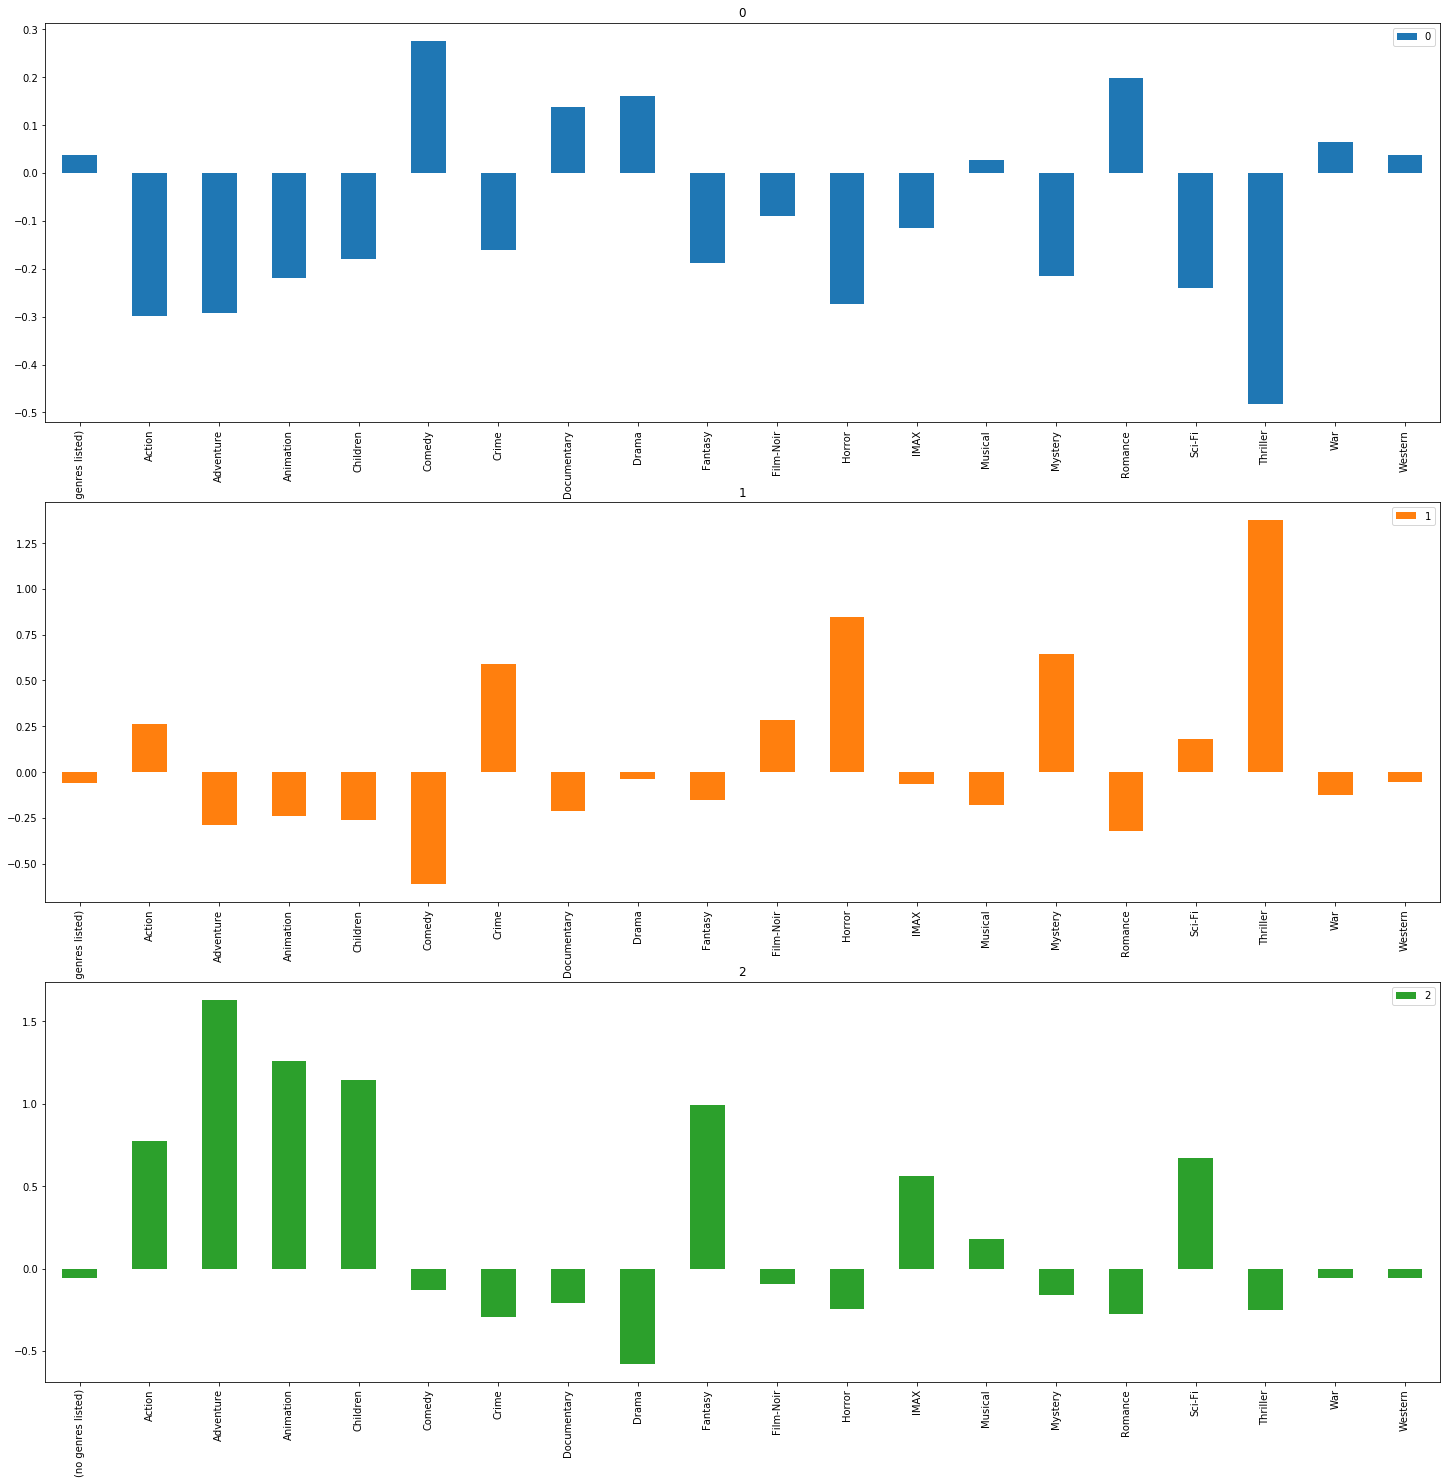

In [107]:
groups.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [110]:
grupo = 0

filtro = model.labels_ == grupo

df[filtro].head(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13,14,Nixon (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
